# Chennai House Price Prediction Project

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

### Load Data to Dataframe

In [2]:
df = pd.read_csv(r"C:\Users\91892\Downloads\House price prediction\Chennai_house_prices.csv")
df.head()

,price,area,status,bhk,bathroom,age,location,builder
0,37.49,872,Ready to move,2,NaN,1.0,Sembakkam,MP Developers
1,93.54,1346,Under Construction,3,2.0,NaN,Selaiyur,DAC Promoters
2,151.00,2225,Under Construction,3,NaN,0.0,Mogappair,Casagrand Builder Private Limited
3,49.00,1028,Ready to move,2,2.0,3.0,Ambattur,Dugar Housing Builders
4,42.28,588,Under Construction,2,1.0,0.0,Pallavaram,Radiance Realty Developers India Ltd


In [3]:
df.shape

(2620, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     2620 non-null   float64
 1   area      2620 non-null   int64  
 2   status    2620 non-null   object 
 3   bhk       2620 non-null   int64  
 4   bathroom  1403 non-null   float64
 5   age       1729 non-null   float64
 6   location  2620 non-null   object 
 7   builder   2620 non-null   object 
dtypes: float64(3), int64(2), object(3)
memory usage: 163.9+ KB


In [5]:
df.describe()

,price,area,bhk,bathroom,age
count,2620.000000,2620.000000,2620.000000,1403.000000,1729.000000
mean,93.834683,1282.925191,2.443893,2.359230,1.355119
std,113.609349,692.566319,0.811984,0.844951,2.102682
min,12.830000,300.000000,1.000000,1.000000,0.000000
25%,42.000000,877.000000,2.000000,2.000000,0.000000
50%,61.735000,1091.500000,2.000000,2.000000,0.000000
75%,90.000000,1471.250000,3.000000,3.000000,3.000000
max,1422.000000,6700.000000,8.000000,7.000000,32.000000


In [6]:
# Drop features that are not required

df1 = df.drop(['status','builder'],axis=1)
df1.head()

,price,area,bhk,bathroom,age,location
0,37.49,872,2,NaN,1.0,Sembakkam
1,93.54,1346,3,2.0,NaN,Selaiyur
2,151.00,2225,3,NaN,0.0,Mogappair
3,49.00,1028,2,2.0,3.0,Ambattur
4,42.28,588,2,1.0,0.0,Pallavaram


In [7]:
# Check for any missing values

df1.isnull().sum()

price          0
area           0
bhk            0
bathroom    1217
age          891
location       0
dtype: int64

In [8]:
# As the missing values are higher, it is better to drop those columns

df2 = df1.drop(['bathroom','age'],axis=1)
df2.head()

,price,area,bhk,location
0,37.49,872,2,Sembakkam
1,93.54,1346,3,Selaiyur
2,151.00,2225,3,Mogappair
3,49.00,1028,2,Ambattur
4,42.28,588,2,Pallavaram


### Feature Engineering

In [9]:
df2.location.value_counts()

location
Veppampattu         149
Pammal              139
Medavakkam          111
Sholinganallur       99
Perungudi            88
                   ... 
Jeth Nagar            1
Sevvapet              1
Gokulapuram           1
Iyyapa Nagar          1
Kil Ayanambakkam      1
Name: count, Length: 178, dtype: int64

In [10]:
# No of Unique Locations

len(df2.location.unique())

178

In [11]:
df2.location = df2.location.apply(lambda x: x.strip())
location_stats = df2.groupby('location')['location'].agg('count').sort_values(ascending=False)

####  Dimensionality Reduction

Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [12]:
loc_less_10 = location_stats[location_stats<=10]
loc_less_10

location
Urapakkam                         10
Thandalam                         10
Ambattur INDUSTRIAL ESTATE        10
Kilpauk                            9
Saidapet                           9
                                  ..
Red Hills                          1
Padapai                            1
Oragadam Village Ambattur Talu     1
Thiruvidandhai                     1
Padi                               1
Name: location, Length: 119, dtype: int64

In [13]:
df2['location'] = df2['location'].apply(lambda x: 'other' if x in loc_less_10 else x)

In [14]:
len(df2.location.unique())

60

In [15]:
df2.head(20)

,price,area,bhk,location
0,37.49,872,2,Sembakkam
1,93.54,1346,3,Selaiyur
2,151.00,2225,3,Mogappair
3,49.00,1028,2,Ambattur
4,42.28,588,2,Pallavaram
5,188.00,2221,3,other
6,38.00,885,3,Thirumazhisai
7,72.99,936,3,other
8,125.00,2275,4,other
9,24.56,622,2,Perungalathur


In [16]:
df2.shape

(2620, 4)

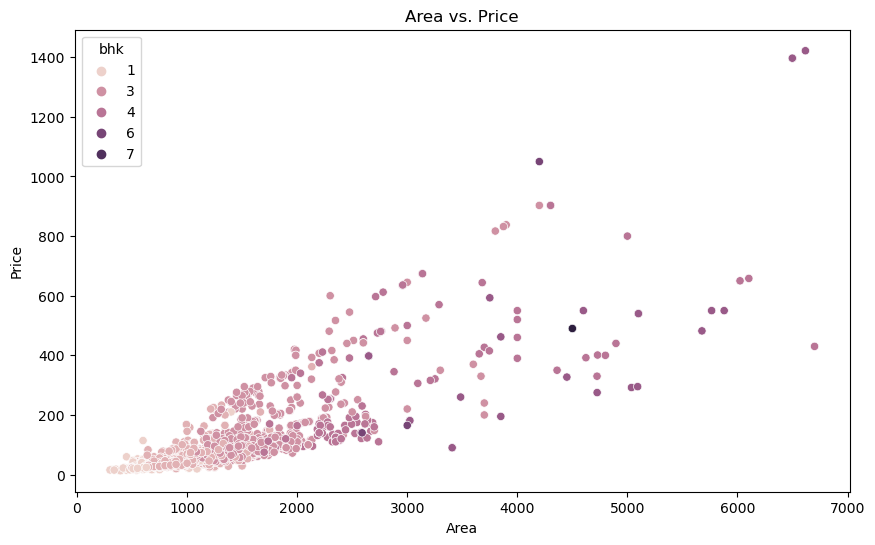

In [17]:
# Area vs price scatter plot

plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='price', hue='bhk', data=df2)
plt.title('Area vs. Price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

#### One Hot Encoding

In [18]:
dummies = pd.get_dummies(df2.location,dtype=int)
dummies.head()

,Adyar,Alwarpet,Ambattur,Anna Nagar,Ayanambakkam,Chromepet,East Tambaram,Gerugambakkam,Gowrivakkam,Guduvancheri,...,Tiruvottiyur,Vadanemmeli,Vadapalani,Vanagaram,Velachery,Vengaivasal,Veppampattu,West Mambalam,other,tambaram west
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df3 = pd.concat([df2,dummies.drop('other',axis=1)],axis=1)
df3.head()

,price,area,bhk,location,Adyar,Alwarpet,Ambattur,Anna Nagar,Ayanambakkam,Chromepet,...,Thirumullaivoyal,Tiruvottiyur,Vadanemmeli,Vadapalani,Vanagaram,Velachery,Vengaivasal,Veppampattu,West Mambalam,tambaram west
0,37.49,872,2,Sembakkam,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,93.54,1346,3,Selaiyur,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,151.00,2225,3,Mogappair,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,49.00,1028,2,Ambattur,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,42.28,588,2,Pallavaram,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df3.drop('location',axis=1,inplace=True)
df3.head()

,price,area,bhk,Adyar,Alwarpet,Ambattur,Anna Nagar,Ayanambakkam,Chromepet,East Tambaram,...,Thirumullaivoyal,Tiruvottiyur,Vadanemmeli,Vadapalani,Vanagaram,Velachery,Vengaivasal,Veppampattu,West Mambalam,tambaram west
0,37.49,872,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,93.54,1346,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,151.00,2225,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,49.00,1028,2,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,42.28,588,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Model Building

In [21]:
X = df3.drop('price',axis=1)
y = df3['price']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [23]:
# Linear Regression

from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8201136604661972

#### Use K Fold Cross Validation to measure accuracy

In [24]:
from sklearn.model_selection import ShuffleSplit, cross_val_score

cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=42)

cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.88627602, 0.83026228, 0.86285109, 0.87229014, 0.84722952])

In the 5 iterations, the score is above 80% all the time. This is pretty good but we want to test few other algorithms for regression to see to get even better score. We will use GridSearchCV for this purpose.

#### Find best model using GridSearchCV

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


def find_best(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {'positive': [True, False]}
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {'criterion': ['friedman_mse', 'poisson'], 'splitter': ['best', 'random']}
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {'n_estimators': [10, 30, 50], 'criterion': ['squared_error', 'absolute_error']}
        },
        'gradient_boosting': {
            'model': GradientBoostingRegressor(),
            'params': {'n_estimators': [10, 50, 100], 'learning_rate': [0.01, 0.1, 0.2]}
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
    
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False, error_score='raise')
        gs.fit(X, y)
        scores.append({'model': algo_name, 'best_score': gs.best_score_, 'best_params': gs.best_params_})
    
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])


In [31]:
find_best(X,y)

,model,best_score,best_params
0,linear_regression,0.859782,{'positive': False}
1,decision_tree,0.840972,"{'criterion': 'friedman_mse', 'splitter': 'ran..."
2,random_forest,0.857193,"{'criterion': 'absolute_error', 'n_estimators'..."
3,gradient_boosting,0.854958,"{'learning_rate': 0.2, 'n_estimators': 100}"


__Based on above results, LinearRegression gives the best score.__

In [33]:
from sklearn.metrics import r2_score

# Train the chosen model
best_model = LinearRegression(positive=False)
best_model.fit(X_train, y_train)

# Make predictions
y_pred = best_model.predict(X_test)

# Calculate evaluation metric
r2 = r2_score(y_test, y_pred)

# Print the results

print(f"R-squared (R²) Score: {r2}")

R-squared (R²) Score: 0.8201136604661972


### Test the model for few properties

In [27]:
def predict_price(location,sqft,bhk):
    loc_index =np.where(X.columns==location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bhk
    if loc_index>=0:
        x[loc_index] = 1
    return lr_clf.predict([x])[0]

In [28]:
predict_price('Madhavaram',1300,3)

58.32751614328747

In [29]:
predict_price('Anna Nagar',1500,3)

232.05601740452062

In [30]:
predict_price('Alwarpet',2500,3)

564.6954475802257

### Export the tested model to a pickle file

In [31]:
import pickle
with open('chennai_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [32]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))